# Subclass Measurements_Utils

In [1]:
%matplotlib inline
import numpy as np
from wavewatson import Waveform

gd = Waveform.load_from_file(filepath=r"demo_signals\gd.npz")
vcc = Waveform.load_from_file(filepath=r"demo_signals\vcc.npz")
vout = Waveform.load_from_file(filepath=r"demo_signals\vout.npz")

t = np.linspace(0, 1, 500, endpoint=False)
sine = Waveform(time=t, data=10 * np.sin(2 * np.pi * 5 * t) * np.linspace(0,1,len(t))[::-1])

Waveform --> Name:wave_000, Length:1000, SampleRate:3.842e+06, Tstart: 0.000e+00, Tstop:2.600e-04
Waveform --> Name:wave_000, Length:1000, SampleRate:2.005e+02, Tstart: 1.611e-02, Tstop:5.000e+00
Waveform --> Name:wave_000, Length:1000, SampleRate:1.004e+04, Tstart: 1.438e-04, Tstop:9.969e-02
Waveform --> Name:wave_000, Length:500, SampleRate:5.000e+02, Tstart: 0.000e+00, Tstop:9.980e-01


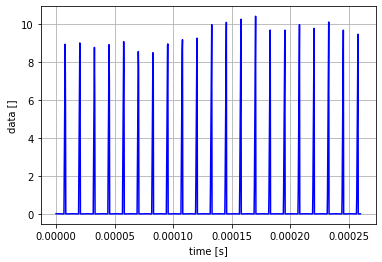

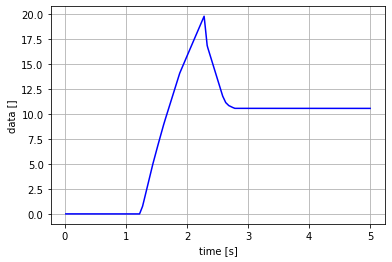

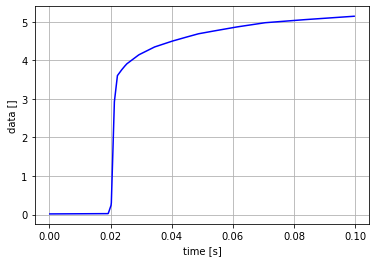

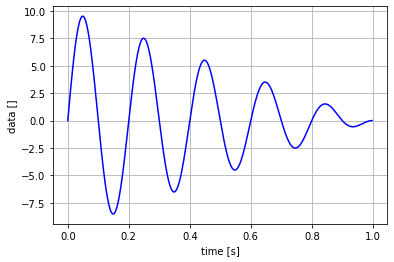

In [2]:
print(gd)
print(vcc)
print(vout)
print(sine)

gd.plot()
vcc.plot()
vout.plot()
sine.plot()

## Argmax & Argmin

Return the time of the first maximum/minimum.

In [3]:
print(vcc.Measurements_Utils.argmax())
print(vcc.Measurements_Utils.argmin())

2.2809177024575704
1.2233435540643598


## Find all crossings

Find all times and slopes where the signal crosses a specific level with hysteresis.

In [4]:
print(vcc.Measurements_Utils.find_all_crossings(level=15,hysteresis=.5, htype="abs", return_indices=False))
print(vcc.Measurements_Utils.find_all_crossings(level=15,hysteresis=.5, htype="abs", return_indices=True))

[{'index': 1.946684363106886, 'slope': 'rise'}, {'index': 2.425585864266076, 'slope': 'fall'}]
[{'index': 387, 'slope': 'rise'}, {'index': 483, 'slope': 'fall'}]


## Find specific crossing

Find all times where the signal crosses a specific level with hysteresis with a desired slope.

In [5]:
gd.Measurements_Utils.find_specific_crossings(level=6, slope="rise", hysteresis=2, htype="abs", return_indices=False)

[7.5475475475475525e-06,
 2.004004004004005e-05,
 3.253253253253255e-05,
 4.502502502502505e-05,
 5.7517517517517553e-05,
 7.001001001001005e-05,
 8.250250250250256e-05,
 9.499499499499505e-05,
 0.00010748748748748755,
 0.00011997997997998006,
 0.00013247247247247256,
 0.00014496496496496506,
 0.00015745745745745756,
 0.00016994994994995005,
 0.00018244244244244255,
 0.00019493493493493507,
 0.00020742742742742756,
 0.00021991991991992006,
 0.00023241241241241255,
 0.0002449049049049051,
 0.00025739739739739757]

In [6]:
print(gd.Measurements_Utils.find_specific_crossings(level=6, slope="rise", hysteresis=2, htype="abs", return_indices=True))

[29, 77, 125, 173, 221, 269, 317, 365, 413, 461, 509, 557, 605, 653, 701, 749, 797, 845, 893, 941, 989]


## Find nth crossing

Find the n-th time where the signal crosses a specific level with hysteresis with a desired slope.

In [7]:
gd.Measurements_Utils.find_nth_crossing(level=6, slope="rise", index=0, hysteresis=2, htype="abs", return_indices=False)

7.5475475475475525e-06

## Find n maxima

Searches at least "min_find_count" maxima.
The signal is splitted in several parts with the splitting points found by intersecting the signal with a
horizontal line. Each pair of positiv and negative crossings defines an area where the signal must have a
maximum.
Also a single falling edge in the beginning as well as a rising edge in the end defines such an area.
Afterwards the index of the maximum is searched in all areas.
If the resulting number of maxima is less than the specified one the line offset is reduced by 5% of
signal range (starting at 100%). This procedure is repeated until the specified number of maxima is found or
the line offset drops below 'min_level' (in this case an exception is raised).

In [8]:
m = gd.Measurements_Utils.find_n_maxima(min_find_count=1, hysteresis=1, stepsize=10)
print(len(m))
m

6


[0.00013299299299299308,
 0.00014548548548548557,
 0.00015797797797797807,
 0.00017047047047047056,
 0.00020794794794794808,
 0.00023293293293293307]

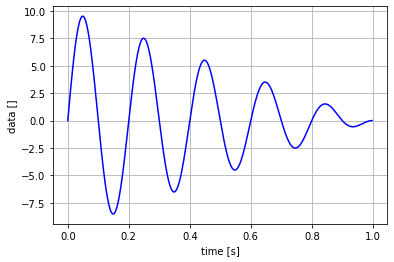

[0.048]
[0.048, 0.248, 0.448]
[0.048, 0.248, 0.448, 0.648]


In [9]:
sine.plot()

print(sine.Measurements_Utils.find_n_maxima(min_find_count=1, hysteresis=1, stepsize=5))
print(sine.Measurements_Utils.find_n_maxima(min_find_count=3, hysteresis=1, stepsize=5))

# Finds more than 2 because stepsize is too big
print(sine.Measurements_Utils.find_n_maxima(min_find_count=2, hysteresis=1, stepsize=40))

## Find n minima

Similar to find_n_maxima

In [10]:
m = gd.Measurements_Utils.find_n_minima(min_find_count=1, hysteresis=1, stepsize=10)
print(len(m))
m

22


[6.766766766766771e-06,
 1.925925925925927e-05,
 3.175175175175177e-05,
 4.4244244244244274e-05,
 5.673673673673677e-05,
 6.922922922922928e-05,
 8.172172172172177e-05,
 8.328328328328333e-05,
 0.00010670670670670678,
 0.00011919919919919927,
 0.00012076076076076084,
 0.00014418418418418426,
 0.00015667667667667678,
 0.00015823823823823833,
 0.00018166166166166177,
 0.00018322322322322334,
 0.00019571571571571584,
 0.00020820820820820833,
 0.00022070070070070083,
 0.00023319319319319335,
 0.00024568568568568585,
 0.00025817817817817834]

## Find maxima at level

Similar to find_n_maxima but the level of the intersection line is given so maxima above this line are found

In [11]:
m = gd.Measurements_Utils.find_maxima_at_level(level=9, hysteresis=1)
print(len(m))
m

10


[0.00013299299299299308,
 0.00014548548548548557,
 0.00015797797797797807,
 0.00017047047047047056,
 0.0001829629629629631,
 0.00019545545545545558,
 0.00020794794794794808,
 0.00022044044044044057,
 0.00023293293293293307,
 0.0002454254254254256]

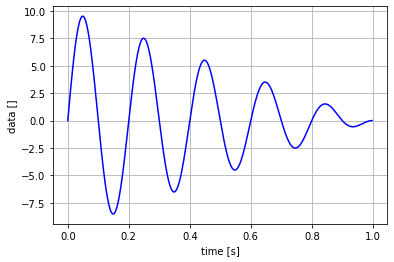

[0.048, 0.248, 0.448]
[0.048, 0.248]
[0.048]
[0.048, 0.248, 0.448, 0.648, 0.844]


In [12]:
sine.plot()

print(sine.Measurements_Utils.find_maxima_at_level(level=5, hysteresis=1))
print(sine.Measurements_Utils.find_maxima_at_level(level=7.5, hysteresis=0))
print(sine.Measurements_Utils.find_maxima_at_level(level=7.5, hysteresis=0.1))
print(sine.Measurements_Utils.find_maxima_at_level(level=0, hysteresis=1))

## Find minima at level

Similar to find_n_minima but the level of the intersection line is given so minima below this line as found

In [13]:
m = gd.Measurements_Utils.find_minima_at_level(level=1, hysteresis=1)
print(len(m))
m

22


[6.766766766766771e-06,
 1.925925925925927e-05,
 3.175175175175177e-05,
 4.4244244244244274e-05,
 5.673673673673677e-05,
 6.922922922922928e-05,
 8.172172172172177e-05,
 8.328328328328333e-05,
 0.00010670670670670678,
 0.00011919919919919927,
 0.00012076076076076084,
 0.00014418418418418426,
 0.00015667667667667678,
 0.00015823823823823833,
 0.00018166166166166177,
 0.00018322322322322334,
 0.00019571571571571584,
 0.00020820820820820833,
 0.00022070070070070083,
 0.00023319319319319335,
 0.00024568568568568585,
 0.00025817817817817834]

## Find periods

Finds all periods with a specific starting slope and a specific level

In [14]:
p = gd.Measurements_Utils.find_periods(start_slope="rise", level=6, hysteresis=1)
print(len(p))
p

20


[[7.287287287287292e-06, 8.068068068068073e-06, 1.977977977977979e-05],
 [1.977977977977979e-05, 2.0560560560560572e-05, 3.227227227227229e-05],
 [3.227227227227229e-05, 3.305305305305307e-05, 4.4764764764764795e-05],
 [4.4764764764764795e-05, 4.554554554554557e-05, 5.725725725725729e-05],
 [5.725725725725729e-05, 5.8038038038038074e-05, 7.001001001001005e-05],
 [7.001001001001005e-05, 7.053053053053058e-05, 8.250250250250256e-05],
 [8.250250250250256e-05, 8.302302302302307e-05, 9.47347347347348e-05],
 [9.47347347347348e-05, 9.551551551551558e-05, 0.00010748748748748755],
 [0.00010748748748748755, 0.00010800800800800807, 0.00011997997997998006],
 [0.00011997997997998006, 0.00012050050050050057, 0.00013247247247247256],
 [0.00013247247247247256, 0.00013299299299299308, 0.00014496496496496506],
 [0.00014496496496496506, 0.00014548548548548557, 0.00015745745745745756],
 [0.00015745745745745756, 0.00015797797797797807, 0.00016994994994995005],
 [0.00016994994994995005, 0.000170470470470470

## Within limit

Returns True or False, if the signal has values lower than, or greater than the thresholds.

In [15]:
vout.Measurements_Utils.within_limit(-0.1, 5.5)

True

## Find n highest values

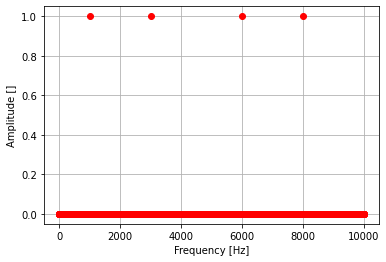

In [16]:
t = np.linspace(0,1,20000, endpoint=False)
s1 = 1 * np.sin(2 * np.pi * 1000 * t)
s2 = 1 * np.sin(2 * np.pi * 3000 * t)
s3 = 1 * np.sin(2 * np.pi * 6000 * t)
s4 = 1 * np.sin(2 * np.pi * 8000 * t)
w = Waveform(time=t, data=s1+s2+s3+s4)
f = w.fft()
f.plot()

In [17]:
print(f.Measurements_Utils.find_n_highest_values(find_count=4, return_indices=True))
print(f.Measurements_Utils.find_n_highest_values(find_count=4, return_indices=False))

[1000 8000 6000 3000]


In [18]:
f.Measurements_Utils.find_n_lowest_values(find_count=4, return_indices=True)

array([1153, 2846, 5654, 7785], dtype=int64)